<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
!pip install seaborn==0.11.0
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.1/283.1 kB 24.9 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.9.0
    Uninstalling seaborn-0.9.0:
      Successfully uninstalled seaborn-0.9.0


Load the dataset into a dataframe.


In [77]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [78]:
df

Respondent                      MainBranch Hobbyist  \
0               4  I am a developer by profession       No   
1               9  I am a developer by profession      Yes   
2              13  I am a developer by profession      Yes   
3              16  I am a developer by profession      Yes   
4              17  I am a developer by profession      Yes   
...           ...                             ...      ...   
11393       25136  I am a developer by profession      Yes   
11394       25137  I am a developer by profession      Yes   
11395       25138  I am a developer by profession      Yes   
11396       25141  I am a developer by profession      Yes   
11397       25142  I am a developer by profession      Yes   

                                             OpenSourcer  \
0                                                  Never   
1                             Once a month or more often   
2      Less than once a month but more than once per ...   
3                                                  Never   
4      Less than once a month but more than once per ...   
...                                                  ...   
11393                                              Never   
11394                                              Never   
11395                            Less than once per year   
11396  Less than once a month but more than once per ...   
11397  Less than once a month but more than once per ...   

                                              OpenSource          Employment  \
0      The quality of OSS and closed source software ...  Employed full-time   
1      The quality of OSS and closed source software ...  Employed full-time   
2      OSS is, on average, of HIGHER quality than pro...  Employed full-time   
3      The quality of OSS and closed source software ...  Employed full-time   
4      The quality of OSS and closed source software ...  Employed full-time   
...                                                  ...                 ...   
11393  OSS is, on average, of HIGHER quality than pro...  Employed full-time   
11394  The quality of OSS and closed source software ...  Employed full-time   
11395  The quality of OSS and closed source software ...  Employed full-time   
11396  OSS is, on average, of LOWER quality than prop...  Employed full-time   
11397  OSS is, on average, of HIGHER quality than pro...  Employed full-time   

              Country Student  \
0       United States      No   
1         New Zealand      No   
2       United States      No   
3      United Kingdom      No   
4           Australia      No   
...               ...     ...   
11393   United States      No   
11394          Poland      No   
11395   United States      No   
11396     Switzerland      No   
11397  United Kingdom      No   

                                                 EdLevel  \
0               Bachelor’s degree (BA, BS, B.Eng., etc.)   
1      Some college/university study without earning ...   
2            Master’s degree (MA, MS, M.Eng., MBA, etc.)   
3            Master’s degree (MA, MS, M.Eng., MBA, etc.)   
4               Bachelor’s degree (BA, BS, B.Eng., etc.)   
...                                                  ...   
11393        Master’s degree (MA, MS, M.Eng., MBA, etc.)   
11394        Master’s degree (MA, MS, M.Eng., MBA, etc.)   
11395        Master’s degree (MA, MS, M.Eng., MBA, etc.)   
11396  Secondary school (e.g. American high school, G...   
11397          Other doctoral degree (Ph.D, Ed.D., etc.)   

                                          UndergradMajor  ...  \
0      Computer science, computer engineering, or sof...  ...   
1      Computer science, computer engineering, or sof...  ...   
2      Computer science, computer engineering, or sof...  ...   
3                                                    NaN  ...   
4      Computer science, computer engineering, or sof...  ...   
...                                                  ...  ...   
11393  

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


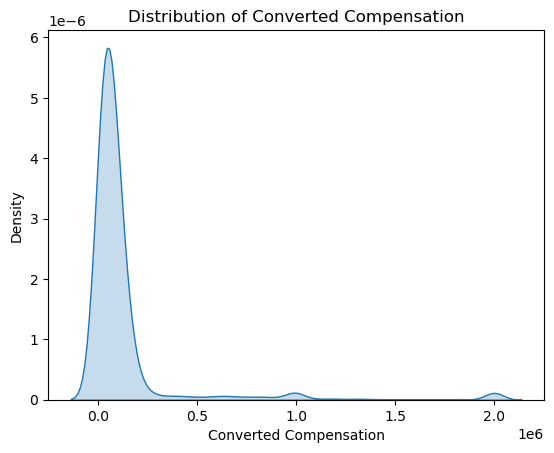

In [79]:
sns.kdeplot(data=df['ConvertedComp'], shade=True).set(title='Distribution of Converted Compensation', xlabel='Converted Compensation', ylabel='Density')
plt.show()


Plot the histogram for the column `ConvertedComp`.


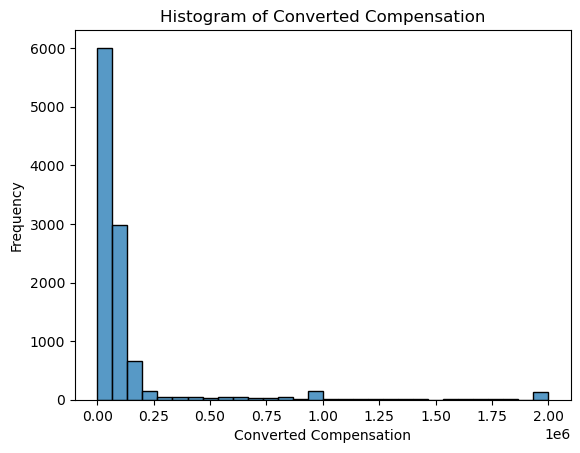

In [6]:
sns.histplot(data=df, x='ConvertedComp', bins=30).set(title='Histogram of Converted Compensation', xlabel='Converted Compensation', ylabel='Frequency')
plt.show()


What is the median of the column `ConvertedComp`?


In [80]:
df['ConvertedComp'].median()


57745.0

How many responders identified themselves only as a **Man**?


In [81]:
print("Gender count for man:", df['Gender'].value_counts()["Man"])


Gender count for man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [82]:
df1 = df[df['Gender']=='Woman']          
print("Woman Median:", df1['ConvertedComp'].median())

Woman Median: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [84]:
df['Age'].describe()


count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


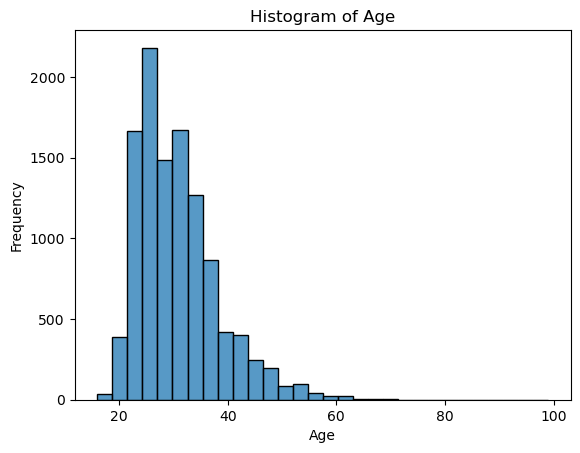

In [83]:
sns.histplot(data=df, x='Age', bins=30).set(title='Histogram of Age', xlabel='Age', ylabel='Frequency')
plt.show()

What is the median of the column Age?


In [85]:
df['Age'].median()

29.0

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


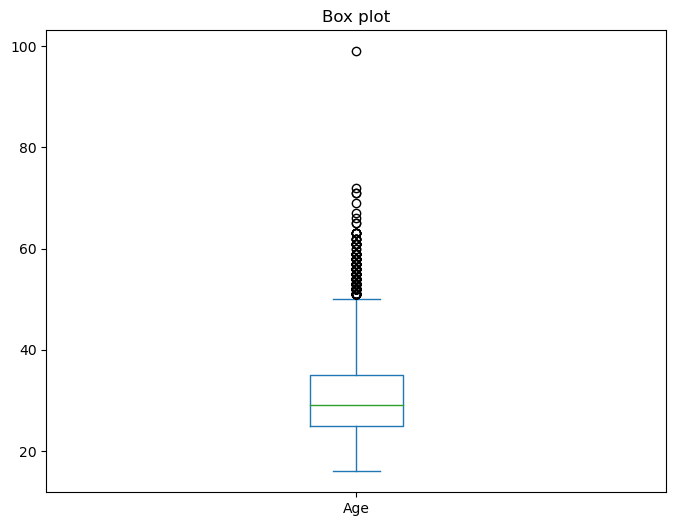

In [86]:
df['Age'].plot.box(figsize=(8, 6)).set(title='Box plot')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [87]:
df['ConvertedComp'].describe()

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [88]:
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print("Interquartile Range for ConvertedComp:", IQR)


Interquartile Range for ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [89]:
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

print("Upper bound for outliers detection:", upper)
print("Lower bound for outliers detection:", lower)



Upper bound for outliers detection: 209698.0
Lower bound for outliers detection: -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [90]:
outliers = (df['ConvertedComp'] < lower) | (df['ConvertedComp'] > upper)

print("number of outliers: " + str(len(outliers)))

outliers

number of outliers: 11398


0        False
1        False
2        False
3         True
4        False
         ...  
11393    False
11394    False
11395    False
11396    False
11397    False
Name: ConvertedComp, Length: 11398, dtype: bool

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [91]:
df4 = [(df['ConvertedComp'] < lower) | (df['ConvertedComp'] > upper)]
df[df4] = np.nan
print(df4)

print("number of outliers: " + str(len(df4)))

[0        False
1        False
2        False
3         True
4        False
         ...  
11393    False
11394    False
11395    False
11396    False
11397    False
Name: ConvertedComp, Length: 11398, dtype: bool]
number of outliers: 1


What is the median of the column ConvertedComp after removing outliers?

In [61]:
df['ConvertedComp'].median()

57745.0

What is the median ConvertedComp after removing outliers?

In [92]:
df['ConvertedComp'].mean()

59883.20838915799

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [40]:
correlation = df.corr()['Age']
print(correlation)


Respondent       0.003950
CompTotal        0.006371
ConvertedComp    0.401821
WorkWeekHrs      0.037452
CodeRevHrs      -0.017961
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
